In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# EDA

In [350]:
data = pd.read_csv('stud_data.csv', delimiter=';')
copy = data
data.columns = [col.replace("\t", " ") for col in data.columns]

In [351]:
print(data.info())
print(data.describe())
target_counts = data['Target'].value_counts()
print(target_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Проверка на пропуски и дубликаты

In [313]:
print(data.isnull().sum())
print(data.duplicated().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### Две ветки обработки

Обработка с "нейтральными" данными и без

In [314]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [352]:
include_enrolled_widget = widgets.ToggleButtons(
    options=[('Включить', 1), ('Исключить', 0)],
    value=0,
    description='Enrolled:'
)
display(include_enrolled_widget)

ToggleButtons(description='Enrolled:', index=1, options=(('Включить', 1), ('Исключить', 0)), value=0)

In [353]:
#фильтрация данных
def filter_dataset(data, include_enrolled):
    if include_enrolled == 1:
        filtered_data = copy
  
    elif include_enrolled == 0:
        filtered_data = data[data['Target'] != 'Enrolled']
    return filtered_data

# обновление данных
def update_data(include_enrolled):
    global data
    data = filter_dataset(data, include_enrolled)
    print(data.iloc[16])
    data.info()
    
# Обработчик изменений виджета
def on_change(change):
    clear_output(wait=True)
    display(include_enrolled_widget)
    update_data(change['new'])

# Добавление обработчика событий
include_enrolled_widget.observe(on_change, names='value')

In [354]:
# иниц с тек значением
update_data(include_enrolled_widget.value)
# print(data.iloc[16])
data.info()

Marital status                                           1
Application mode                                        18
Application order                                        1
Course                                                9238
Daytime/evening attendance                               1
Previous qualification                                   1
Previous qualification (grade)                       137.0
Nacionality                                              1
Mother's qualification                                  19
Father's qualification                                  38
Mother's occupation                                      5
Father's occupation                                      8
Admission grade                                      137.4
Displaced                                                1
Educational special needs                                0
Debtor                                                   0
Tuition fees up to date                                 

Преобразование категоральных признаков

In [355]:
categorical_features = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

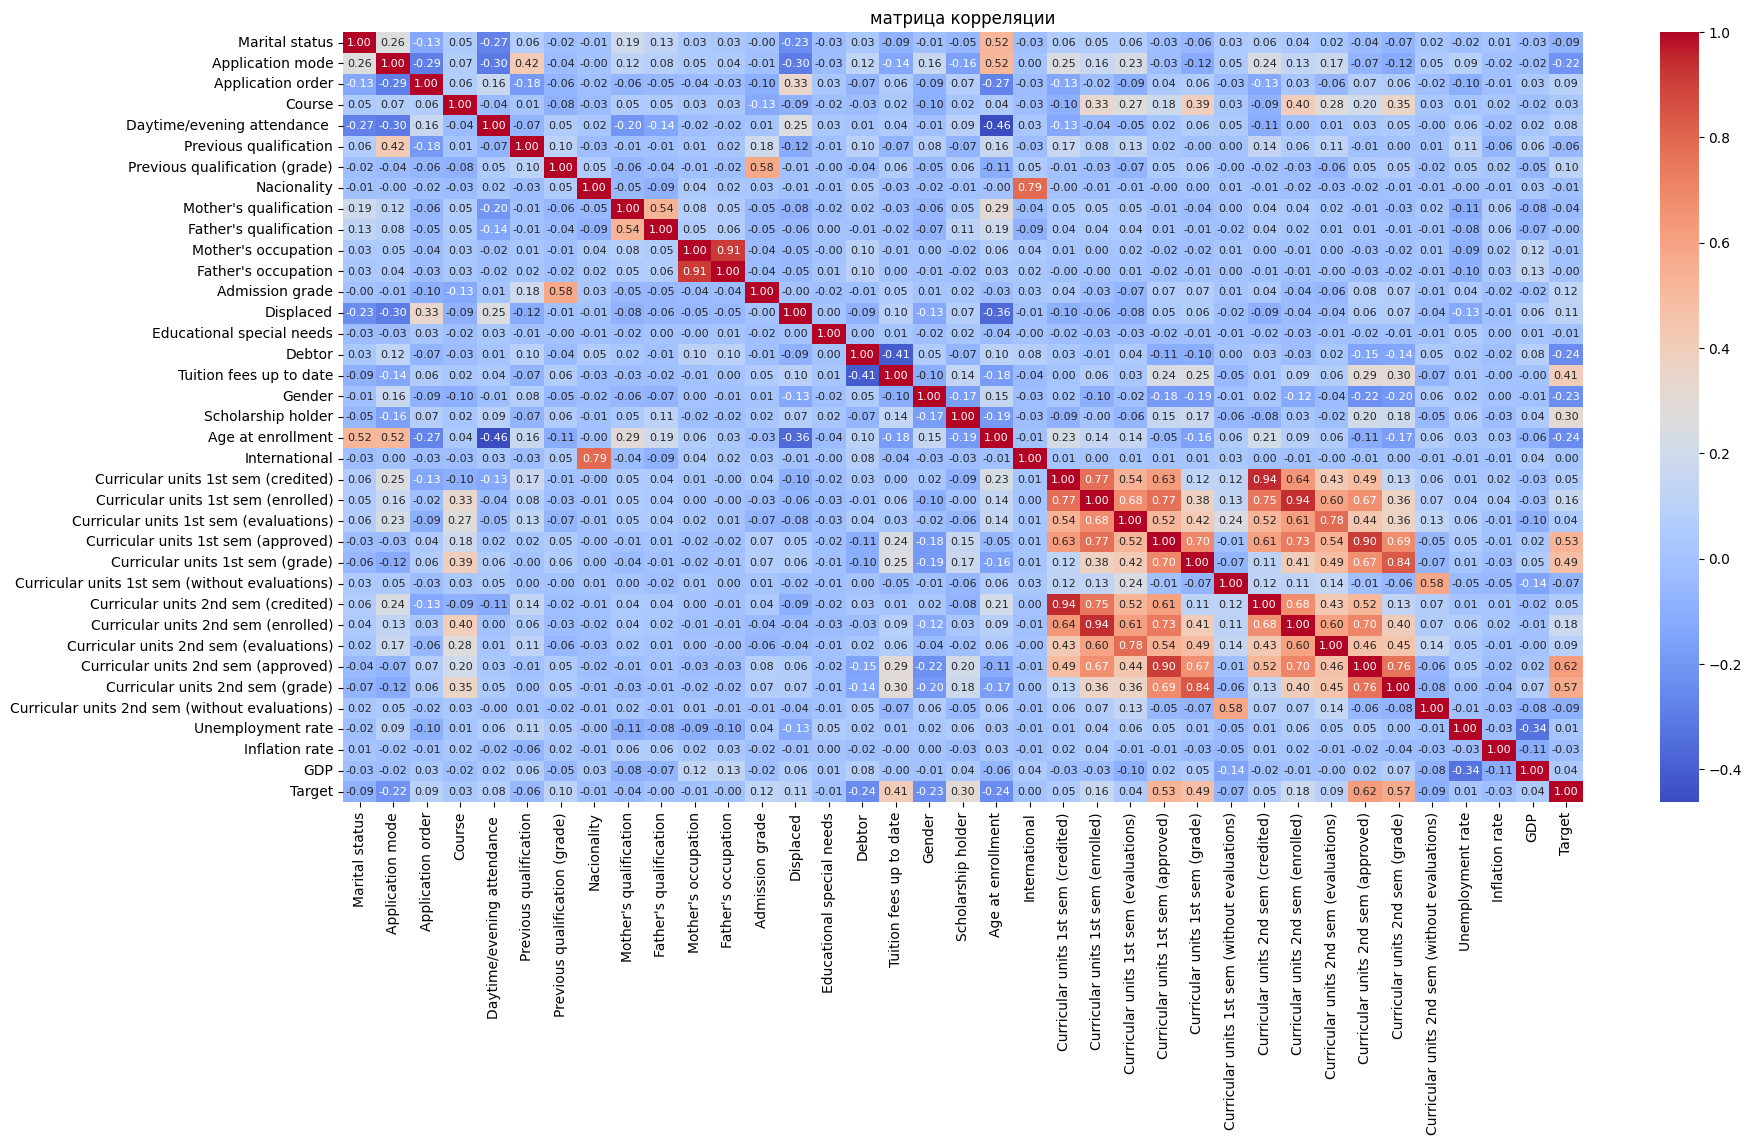

In [356]:
plt.figure(figsize=(20, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('матрица корреляции')
plt.show()

In [357]:
# Нормализация числовых признаков (после кодирования целевой переменной)
X = data.drop(columns=['Target'])
y = data['Target']
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,0.350082,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,...,-0.199273,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667
4420,-0.294829,-1.010660,0.207173,0.444115,0.350082,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,...,-0.199273,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126
4421,-0.294829,-1.010660,-0.554068,0.311805,0.350082,-0.35023,1.621820,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199
4422,-0.294829,-1.010660,-0.554068,0.140722,0.350082,-0.35023,3.593483,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511


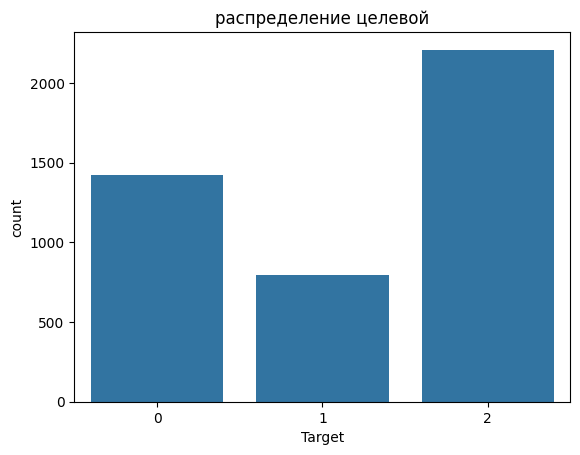

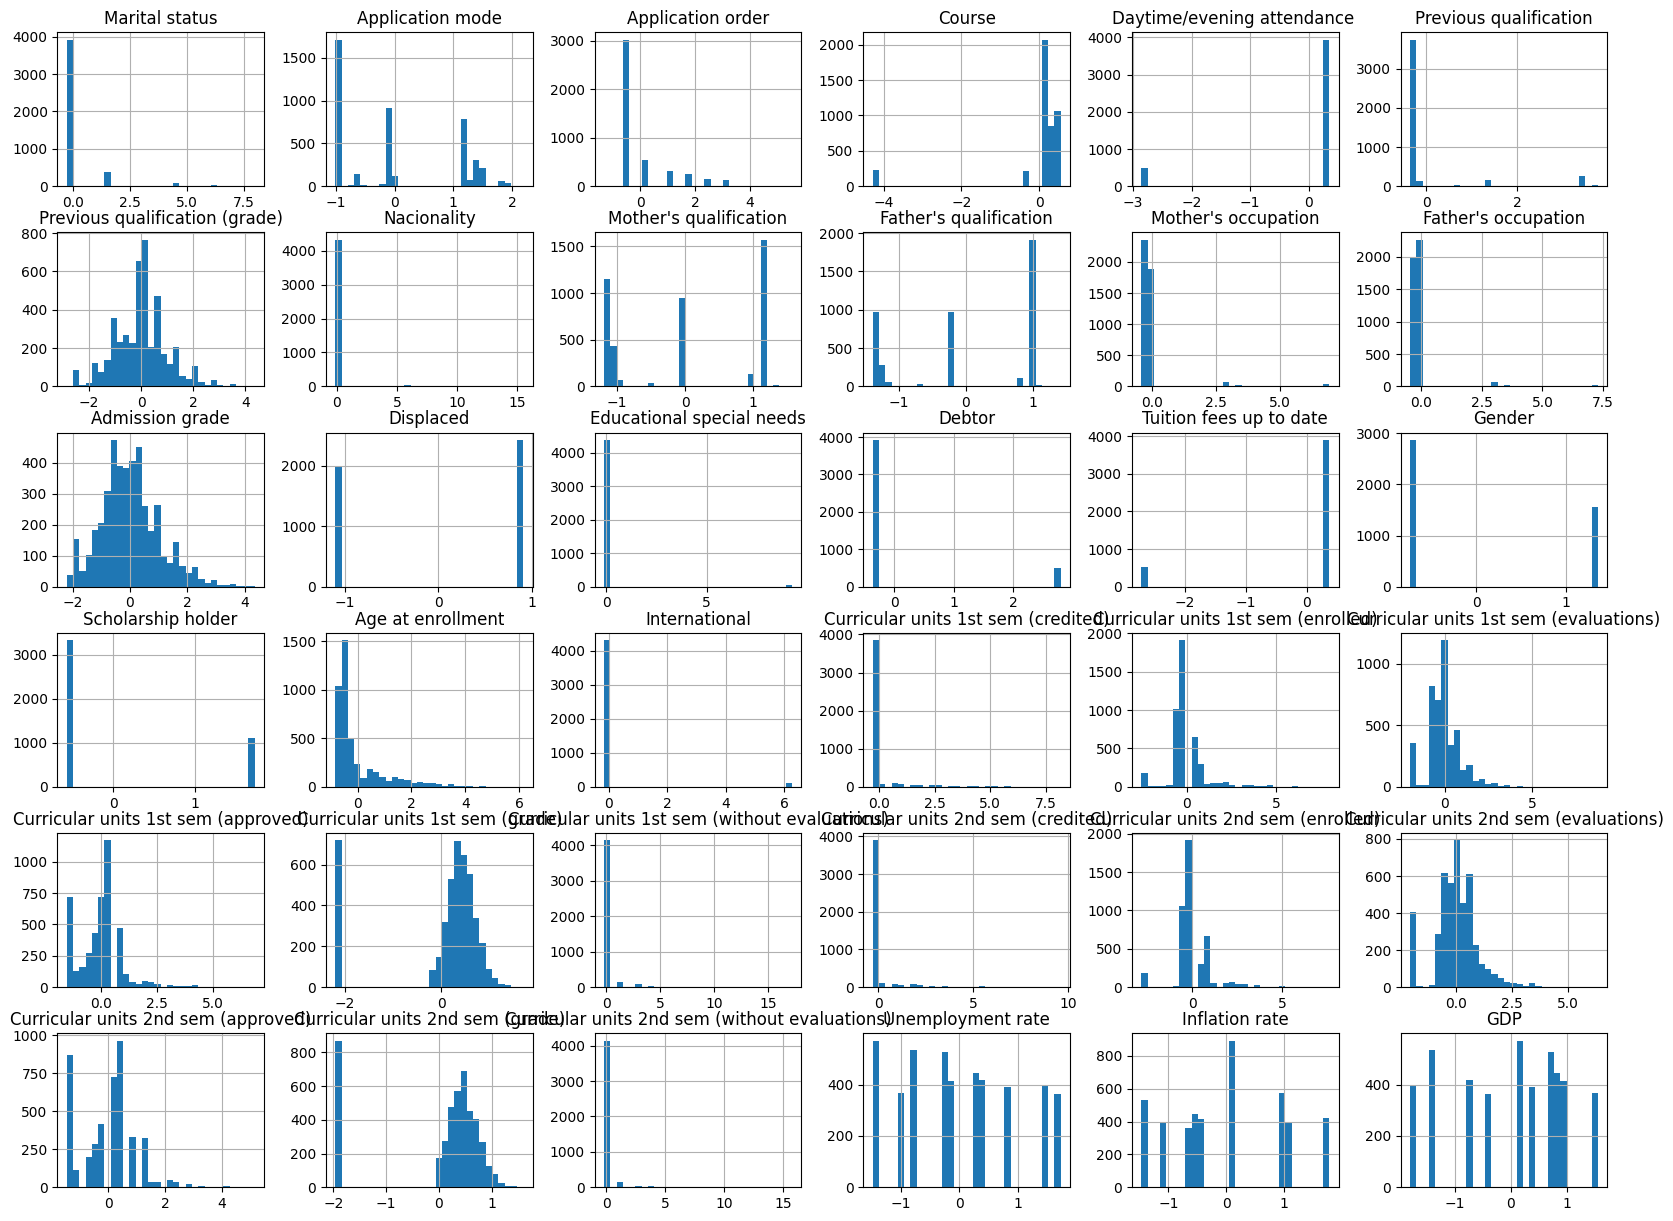

In [358]:
# Распределение целевой переменной
sns.countplot(x=y)
plt.title('распределение целевой')
plt.show()

# Визуализация распределения числовых признаков после нормализации
pd.DataFrame(X, columns=numeric_features).hist(bins=30, figsize=(20, 15))
plt.show()

Существует проблема с не равным распределением целевой переменной, явный перекос в 2 - graduated, посмотрим несколько вариантов - модель обученную на данных с перекосом, и попробуем искусственно компенсировать перекос ресемплингом

# Модели

Разделение данных на тренировочную и тестовую выборки

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [360]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


### Без ресемплинга

Создание модели нейронной сети с регуляризацией и Dropout

In [362]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

In [363]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [364]:
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=32, validation_data=(X_test,y_test)
                    )

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5058 - loss: 1.2327 - val_accuracy: 0.7141 - val_loss: 0.8357
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.6814 - loss: 0.9294 - val_accuracy: 0.7367 - val_loss: 0.7829
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7190 - loss: 0.8215 - val_accuracy: 0.7469 - val_loss: 0.7565
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7277 - loss: 0.8085 - val_accuracy: 0.7469 - val_loss: 0.7421
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7378 - loss: 0.7695 - val_accuracy: 0.7661 - val_loss: 0.7284
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.7501 - loss: 0.7522 - val_accuracy: 0.7593 - val_loss: 0.7204
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7553 - loss: 0.7309 - val_accuracy: 0.7593 - val_loss: 0.7150
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7583 - loss: 0.6980 - val_accu

In [365]:
# Оценка модели на тестовой выборке
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность на тестовой выборке: {test_accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7621 - loss: 0.6675
Точность на тестовой выборке: 0.7605


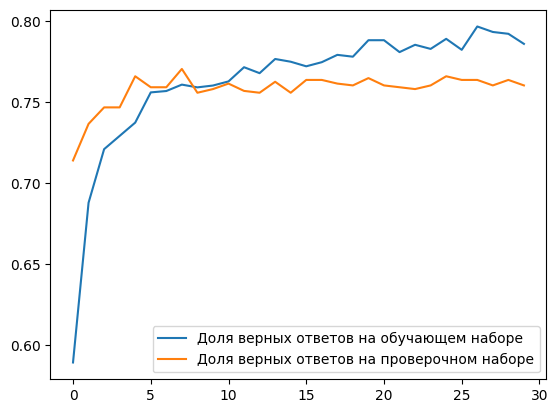

In [366]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.legend()

### Ресемплинг

In [367]:
from collections import Counter

In [368]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [369]:
# Проверка баланса классов в тренировочных данных до SMOTE
print('Original training dataset shape:', Counter(y_train))

# Применение SMOTE к тренировочным данным
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Проверка баланса классов в тренировочных данных после SMOTE
print('Resampled training dataset shape:', Counter(y_train_res))

Original training dataset shape: Counter({2: 1791, 0: 1105, 1: 643})
Resampled training dataset shape: Counter({0: 1791, 1: 1791, 2: 1791})


In [370]:
# Создание модели нейронной сети с регуляризацией и Dropout
model = Sequential([
    Dense(128, input_shape=(X_train_res.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(np.unique(y_train_res)), activation='softmax')
])

/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [371]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [372]:
# Обучение модели и сохранение истории
history = model.fit(X_train_res, y_train_res, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5001 - loss: 1.2220 - val_accuracy: 0.0000e+00 - val_loss: 1.7628
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.9776 - val_accuracy: 0.0744 - val_loss: 1.5125
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6738 - loss: 0.8944 - val_accuracy: 0.0540 - val_loss: 1.5589
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7263 - loss: 0.8357 - val_accuracy: 0.1172 - val_loss: 1.4347
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7434 - loss: 0.7674 - val_accuracy: 0.1433 - val_loss: 1.4328
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.7868 - val_accuracy: 0.1721 - val_loss: 1.4260
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.7556 - val_accuracy: 0.1898 - val_loss: 1.4093
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7354 - loss: 0.7429 - val_accuracy: 0.2037 - val_l

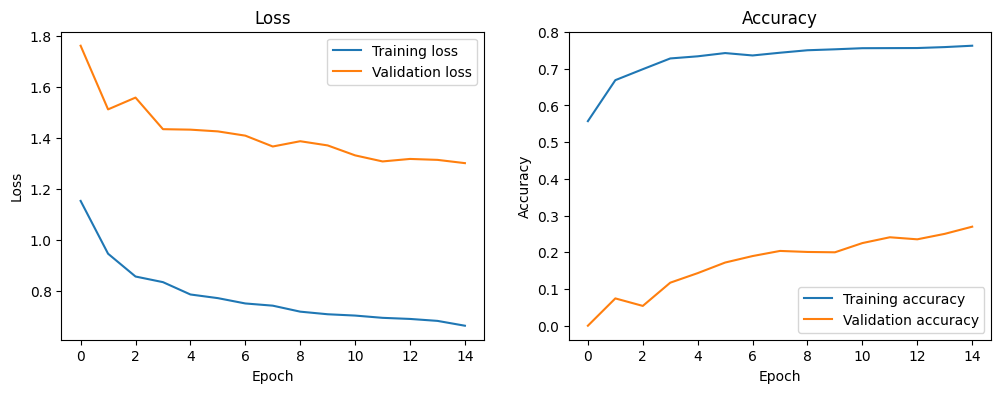

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7631 - loss: 0.7102
Test loss: 0.6990548968315125, Test accuracy: 0.7649717330932617


In [373]:
# визуал
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#оценка
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

### Кросс-валидация

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import StratifiedKFold



In [375]:
# Настройка параметров стратифицированной кросс-валидации
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [376]:
# Листы для хранения результатов
accuracy_scores = []
losses = []

In [377]:
# Кросс-валидация
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

  
    print('Original training dataset shape:', Counter(y_train_fold))


    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)


    print('Resampled training dataset shape:', Counter(y_train_res))


    model = Sequential([
        Dense(128, input_shape=(X_train_res.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(len(np.unique(y_train_res)), activation='softmax')
    ])

 
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Обучение
    history = model.fit(X_train_res, y_train_res, epochs=15, batch_size=128, 
                        validation_data=(X_val_fold, y_val_fold), verbose=0)

    # оценка
    val_predictions = model.predict(X_val_fold)
    val_loss = log_loss(y_val_fold, val_predictions)
    val_accuracy = accuracy_score(y_val_fold, np.argmax(val_predictions, axis=1))

    # сохр
    losses.append(val_loss)
    accuracy_scores.append(val_accuracy)

    print(f'Fold loss: {val_loss}, Fold accuracy: {val_accuracy}')



Original training dataset shape: Counter({2: 1433, 0: 884, 1: 514})
Resampled training dataset shape: Counter({0: 1433, 1: 1433, 2: 1433})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold loss: 0.6248614936625628, Fold accuracy: 0.7344632768361582
Original training dataset shape: Counter({2: 1433, 0: 884, 1: 514})
Resampled training dataset shape: Counter({1: 1433, 2: 1433, 0: 1433})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold loss: 0.6009283500292371, Fold accuracy: 0.748587570621469
Original training dataset shape: Counter({2: 1433, 0: 884, 1: 514})
Resampled training dataset shape: Counter({0: 1433, 1: 1433, 2: 1433})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
Fold loss: 0.6020107121818032, Fold accuracy: 0.7429378531073446
Original training dataset shape: Counter({2: 1432, 0: 884, 1: 515})
Resampled training dataset shape: Counter({0: 1432, 2: 1432, 1: 1432})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
Fold loss: 0.6280894098738411, Fold accuracy: 0.7471751412429378
Original training dataset shape: Counter({2: 1433, 0: 884, 1: 515})
Resampled training dataset shape: Counter({0: 1433, 1: 1433, 2: 1433})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
Fold loss: 0.5947282883610416, Fold accuracy: 0.7411598302687411


In [378]:

# Средняя точность и потери по всем фолдам
mean_accuracy = np.mean(accuracy_scores)
mean_loss = np.mean(losses)
print(f'Mean validation loss: {mean_loss}, Mean validation accuracy: {mean_accuracy}')

# Финальная оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Mean validation loss: 0.6101236508216972, Mean validation accuracy: 0.7428647344153301
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7203 - loss: 0.7489
Test loss: 0.747532069683075, Test accuracy: 0.7333333492279053


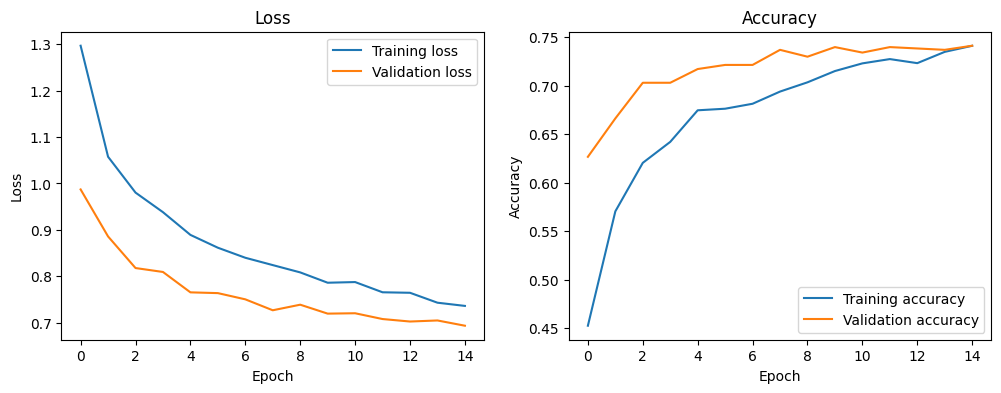

In [379]:
# Построение графиков потерь и точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### ROC и AUC-ROC

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracy_scores = []
losses = []
auc_scores = []


for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    print('Original training dataset shape:', Counter(y_train_fold))


    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)


    print('Resampled training dataset shape:', Counter(y_train_res))

    model = Sequential([
        Dense(128, input_shape=(X_train_res.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(len(np.unique(y_train_res)), activation='softmax')
    ])


    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])


    history = model.fit(X_train_res, y_train_res, epochs=15, batch_size=128, 
                        validation_data=(X_val_fold, y_val_fold), verbose=0)


    val_predictions = model.predict(X_val_fold)
    val_loss = log_loss(y_val_fold, val_predictions)
    val_accuracy = accuracy_score(y_val_fold, np.argmax(val_predictions, axis=1))


    fpr, tpr, _ = roc_curve(y_val_fold, val_predictions[:, 1])  # Используем вероятности для класса 1
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)


    losses.append(val_loss)
    accuracy_scores.append(val_accuracy)

    print(f'Fold loss: {val_loss}, Fold accuracy: {val_accuracy}, Fold AUC-ROC: {roc_auc}')



Original training dataset shape: Counter({1: 1408, 0: 915})
Resampled training dataset shape: Counter({0: 1408, 1: 1408})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold loss: 0.2536322501547635, Fold accuracy: 0.9018932874354562, Fold AUC-ROC: 0.9458490472409686
Original training dataset shape: Counter({1: 1408, 0: 915})
Resampled training dataset shape: Counter({0: 1408, 1: 1408})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
Fold loss: 0.2696200323630874, Fold accuracy: 0.9036144578313253, Fold AUC-ROC: 0.9430825724493848
Original training dataset shape: Counter({1: 1408, 0: 915})
Resampled training dataset shape: Counter({0: 1408, 1: 1408})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
Fold loss: 0.2159442359377568, Fold accuracy: 0.9225473321858864, Fold AUC-ROC: 0.9603017070265979
Original training dataset shape: Counter({1: 1408, 0: 915})
Resampled training dataset shape: Counter({0: 1408, 1: 1408})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold loss: 0.24588992075784363, Fold accuracy: 0.9001721170395869, Fold AUC-ROC: 0.9472881103612545
Original training dataset shape: Counter({1: 1408, 0: 916})
Resampled training dataset shape: Counter({0: 1408, 1: 1408})


/Users/viktoria.nam/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold loss: 0.2468071259707848, Fold accuracy: 0.9137931034482759, Fold AUC-ROC: 0.95159240430622


In [273]:
# Средняя точность, потери и AUC-ROC по всем фолдам
mean_accuracy = np.mean(accuracy_scores)
mean_loss = np.mean(losses)
mean_auc = np.mean(auc_scores)
print(f'Mean validation loss: {mean_loss}, Mean validation accuracy: {mean_accuracy}, Mean validation AUC-ROC: {mean_auc}')

# Финальная оценка модели на тестовых данных
test_predictions = model.predict(X_test)
test_loss = log_loss(y_test, test_predictions)
test_accuracy = accuracy_score(y_test, np.argmax(test_predictions, axis=1))
test_fpr, test_tpr, _ = roc_curve(y_test, test_predictions[:, 1])
test_roc_auc = auc(test_fpr, test_tpr)

print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}, Test AUC-ROC: {test_roc_auc}')


Mean validation loss: 0.24737505053239098, Mean validation accuracy: 0.9063398421271293, Mean validation AUC-ROC: 0.9511776289672176
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
Test loss: 0.25448340816004555, Test accuracy: 0.9008264462809917, Test AUC-ROC: 0.949546927387777


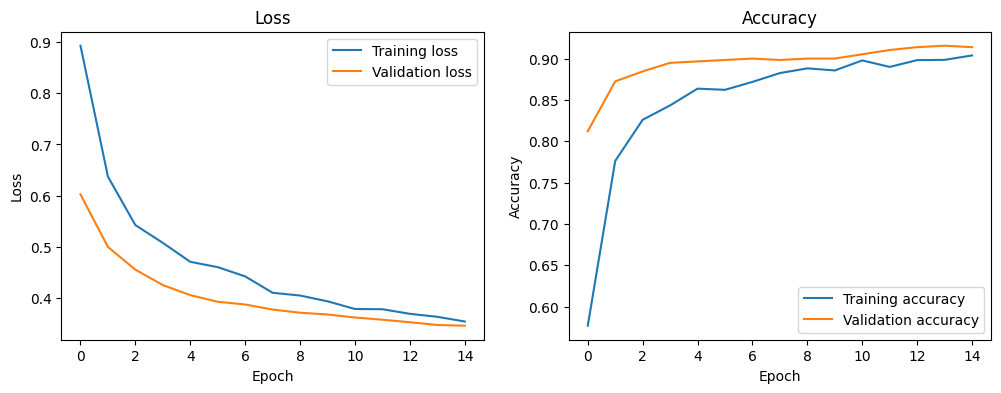

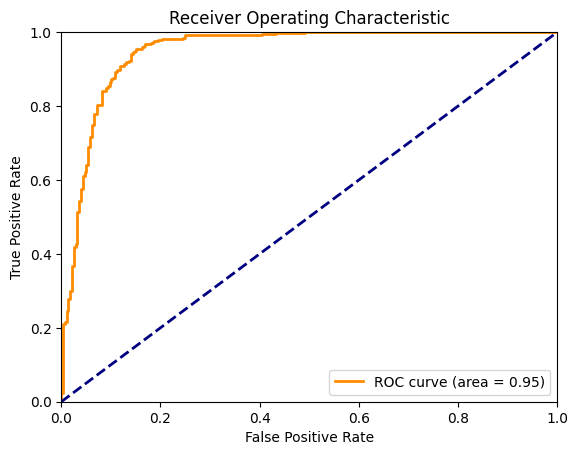

In [345]:
# Построение графиков потерь и точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Построение ROC-кривой для тестовых данных
plt.figure()
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()